In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil

In [ ]:
!unzip '/content/drive/MyDrive/major_steto/Steatosis_Dataset_major.zip' -d '/content/drive/MyDrive/Steatosis_Dataset'

Archive:  /content/drive/MyDrive/major_steto/Steatosis_Dataset_major.zip
replace /content/drive/MyDrive/Steatosis_Dataset/Steatosis_Dataset/100_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dataset='/content/drive/MyDrive/Steatosis_Dataset/Steatosis_Dataset'
for img in os.listdir(dataset):
  print(img)

In [ ]:
def image_feature(dataset):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(dataset):
        fname='/content/drive/MyDrive/Steatosis_Dataset/Steatosis_Dataset'+'/'+i
        img=image.load_img(fname,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

In [ ]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None # Set to the actual imagesize

In [ ]:
img_path=os.listdir('/content/drive/MyDrive/Steatosis_Dataset/Steatosis_Dataset')
img_features,img_names=image_feature(img_path)

In [ ]:
k = 2
clusters = KMeans(k, random_state = 42)
clusters.fit(img_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
image_cluster = pd.DataFrame(img_names,columns=['image'])
image_cluster["clusterid"] = clusters.labels_
image_cluster # 0 denotes cat and 1 denotes dog

,image,clusterid
0,148_1.jpg,1
1,189_2.jpg,0
2,148_5.jpg,1
3,100_2.jpg,1
4,100_4.jpg,1
...,...,...
203,95_2_part2.jpg,0
204,96_5_part1.jpg,0
205,96_5_part2.jpg,0
206,81_1_part1.jpg,1


In [ ]:
from matplotlib import pyplot as plt
image_cluster['clusterid'].plot(kind='line', figsize=(8, 4), title='clusterid')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
image_cluster['clusterid'].plot(kind='hist', bins=20, title='clusterid')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Made folder to seperate images
os.mkdir('0')
os.mkdir('1')
# Images will be seperated according to cluster they belong
for i in range(len(image_cluster)):
    if image_cluster['clusterid'][i]==0:
        shutil.move(os.path.join('/content/drive/MyDrive/Steatosis_Dataset/Steatosis_Dataset', image_cluster['image'][i]), '0')
    else:
        shutil.move(os.path.join('/content/drive/MyDrive/Steatosis_Dataset/Steatosis_Dataset', image_cluster['image'][i]), '1')

In [ ]:
!pip install liverquant


In [ ]:
from PIL import Image
import os

input_folder = '/content/0'
output_folder = '/content/liver_tiff'

os.makedirs(output_folder, exist_ok=True)

converted_images = []

for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.tiff')

        with Image.open(input_path) as img:
            img.save(output_path, format='TIFF')
            converted_images.append(output_path)

# Print the paths of the converted TIFF images
for tiff_path in converted_images:
    print(tiff_path)



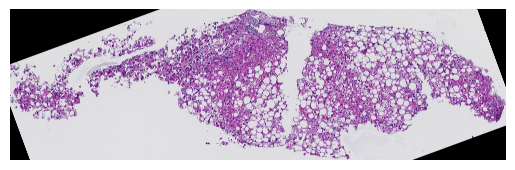

Image format: TIFF
Image size: (11404, 3464)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image file using Pillow
img = Image.open('/content/liver_tiff/132_2.tiff')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

# Get some information about the image
print(f"Image format: {img.format}")
print(f"Image size: {img.size}")

In [ ]:
import matplotlib.pyplot as plt
jpg_image=Image.open('/content/0/133_4.jpg')
tif_image=Image.open('/content/liver_tiff/133_4.tiff')

fig,axs=plt.subplots(1,2,figsize=(14,6))
axs[0].imshow(jpg_image)
axs[0].axis('off')
axs[0].set_title('JPG Image')

axs[1].imshow(tif_image)
axs[1].axis('off')
axs[1].set_title('TIFF Image')

# Show the plot
plt.tight_layout()
plt.show()




In [ ]:
import cv2 as cv
from liverquant import detect_fat_globules

# read sample image tile
img = cv.imread('/content/liver_tiff/132_4.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Detect globules
mask = detect_fat_globules(img, resolution=0.7878)

# Tag globules with green color
img[mask == 255, :] = [5, 255, 5]

# write the tagged image
success=coloured_image=cv.imwrite('/content/liver_tiff/132_4_mod.tiff', cv.cvtColor(img, cv.COLOR_BGR2RGB))
print(success)
print(type(coloured_image))
# plt.imshow(coloured_image)
# plt.title('Modified Image')
# plt.axis('off')  # Hide axes
# plt.show()

True
<class 'bool'>


In [ ]:
!pip install tiffslide

In [ ]:
import cv2 as cv
import numpy as np
from liverquant import detect_fat_globules
from tiffslide import TiffSlide  # Assuming this is the library for reading whole slide images

# Read whole slide image
slide_path = '/content/liver_tiff/133_4.tiff'
slide = TiffSlide(slide_path)

# Get the dimensions of the whole slide image
slide_width, slide_height = slide.dimensions

# Initialize an empty mask for storing fat globules
mask = np.zeros((slide_height, slide_width), dtype=np.uint8)

# Define the size of the tiles (e.g., 512x512 pixels)
tile_width = 5000
tile_height = 3000

level = 0

# Process the whole slide image
for x in range(0, slide_width, tile_width):
  if x + tile_width > slide_width:
        x = slide_width - tile_width
  for y in range(0, slide_height, tile_height):
    if y + tile_height > slide_height:
            y = slide_height - tile_height

        # Read a tile
    tile = slide.read_region((x, y), level, (tile_width, tile_height))

        # Convert tile to RGB (assuming it's not already in RGB format)
    tile = cv.cvtColor(np.array(tile), cv.COLOR_BGR2RGB)

        # Detect fat globules in the tile
    tile_mask = detect_fat_globules(tile, resolution=0.1122)
        # Option 1: Resize the tile_mask to match the mask section
    mask[y:y+tile_height, x:x+tile_width] = tile_mask

# Option 2: Crop the mask section to match the tile_mask

        # Update the mask with the detected fat globules
        # mask[y:y+tile_height, x:x+tile_width] = tile_mask

# Tag globules with green color in the original whole slide image
img = np.array(slide.read_region((0, 0), level, (slide_width, slide_height)))
img[mask == 255, :] = [5, 255, 5]

# Write the modified image
success = cv.imwrite('/content/liver_tiff/133_4_mod.tiff', cv.cvtColor(img, cv.COLOR_BGR2RGB))
print(success)


True


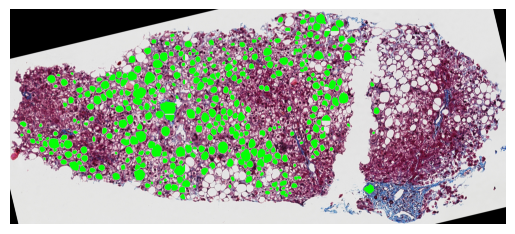

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the modified image
modified_img = mpimg.imread('/content/liver_tiff/133_4_mod.tiff')

# Display the image
plt.imshow(modified_img)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import os

# Define paths to training and testing folders
train_folder = '/path/to/training/folder'
test_folder = '/path/to/testing/folder'

# Initialize lists to store processed images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

# Iterate over the images in the training folder
for filename in os.listdir(train_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(train_folder, filename)
        img = Image.open(img_path)
        img_array = np.array(img)
        img_array = tf.expand_dims(img_array, 0)
        train_images.append(img_array)
        # Assuming you have a way to determine the label for each image
        train_labels.append(get_label_from_filename(filename))

# Iterate over the images in the testing folder
for filename in os.listdir(test_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(test_folder, filename)
        img = Image.open(img_path)
        img_array = np.array(img)
        img_array = tf.expand_dims(img_array, 0)
        test_images.append(img_array)
        # Assuming you have a way to determine the label for each image
        test_labels.append(get_label_from_filename(filename))

# Convert the lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Use the processed images and labels for further processing or training


In [ ]:
!pip install skimage

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

from transformers import ViTFeatureExtractor, ViTForImageClassification

from transformers import ViTForImageClassification, ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
model = ViTForImageClassification.from_pretrained(model_name_or_path)
processor = ViTImageProcessor.from_pretrained(model_name_or_path)
# Step 1: Preprocess Images
import os

# Path to the folder containing images
folder_path = '/content/0'

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


# image_file = image_files[0]
# image_path = os.path.join(folder_path,image_file)


# Process each image in the folder
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(folder_path, image_file)

    # Load and preprocess the image
    img = Image.open(image_path)
    img_array = np.array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Use Vision Transformer
    features = ViTFeatureExtractor(model_name_or_path)(images=img_array, return_tensors="pt")
    outputs = model(**features)
    # print(type(outputs))
    # last_hidden_state = outputs.pooler_output
    # last_hidden_state = outputs.last_hidden_state

    patch_embeddings =features['pixel_values']

    num_patches = patch_embeddings.shape[1]
    sqrt_num_patch = int(np.ceil(np.sqrt(num_patches)))

    plt.figure(figsize = (12,12))
    for i in range(num_patches):
        plt.subplot(sqrt_num_patch, sqrt_num_patch, i + 1)
        patch = patch_embeddings[0,i].numpy()
        plt.imshow(patch)
        plt.axis('off')
        plt.title(f'Patch {i}')

    plt.suptitle(f'Patches Extracted by Vision Transformer for Image: {image_file}', y=0.92)
    plt.tight_layout()
    plt.show()

    total_area = patch_embeddings.shape[1]  # Total number of patches
    steatosis_area = patch_embeddings.sum()
    print(steatosis_area) # Sum of patch embeddings (higher values indicate more steatosis)
    steatosis_proportionate_area = (steatosis_area / total_area)/1000

    print(f"Steatosis Proportionate Area : {steatosis_proportionate_area:.2f}")




# layer_features = outputs['hidden_states'][-2]

# plt.figure(figsize = (6,6))
# plt.show(img_array[0])
# plt.axis('off')
# plt.title('Original Image')

# Display the patches extracted by the Vision Transformer
#     num_patches = last_hidden_state.shape[1]
# # patch_size = int(np.sqrt(last_hidden_state.shape[2]))
#     sqrt_num_patches = int(np.ceil(np.sqrt(num_patches)))

# plt.figure(figsize=(12, 12))
# for i in range(num_patches):
#     plt.subplot(sqrt_num_patches, sqrt_num_patches, i + 1)
#     patch = last_hidden_state[0,i].reshape(patch_size, patch_size).detach().cpu().numpy()
#     plt.imshow(patch, cmap='gray')
#     plt.axis('off')
#     plt.title(f'Patch {i}')

# plt.suptitle('Patches Extracted by Vision Transformer', y=0.92)
# plt.tight_layout()
# plt.show()
#     # Process the outputs as needed
    # For example, extract steatosis regions and measure their area proportion



In [ ]:
img_path = '/content/0/132_2.jpg'
img = Image.open(img_path)

img_array = np.array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Detect steatosis in the image

# def preprocess_image(image_path):
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, (224, 224))  # Resize to match model input size
#     image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
#     return image

# Step 2: Use Vision Transformer
features = ViTFeatureExtractor(model_name_or_path)(images=img_array, return_tensors="pt")
# features = feature_extractor(images=img_array, return_tensors="pt")
outputs = model(**features)


In [ ]:
import os
from pathlib import Path

# Path to the folder containing images
folder_path = '/content/zero/'

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is an image
    if file_name.endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')):
        # Construct the full path to the image file
        img_path = os.path.join(folder_path, file_name)
        img = Image.open(img_path)

        img_array = np.array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create a batch

        # Use Vision Transformer
        features = ViTFeatureExtractor(model_name_or_path)(images=img_array, return_tensors="pt")
        outputs = model(**features)

        # Process the outputs as needed
        # For example, print the predictions for each image
        print(f"Predictions for {file_name}: {outputs}")


In [ ]:
!pip install explainerdashboard

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

# from skimage.feature import graycomatrix, graycoprops


# from explainerdashboard import ClassifierExplainer, ExplainerDashboard
# from transformers import ViTForImageClassification

 # Define the model
# model_name_or_path = 'google/vit-base-patch16-224-in21k'
# model = ViTForImageClassification.from_pretrained(model_name_or_path)

# Path to the folder containing images
folder_path = '/content/0'
image_data = np.array([cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE) for filename in os.listdir(folder_path)])
# Example minimum area threshold (adjust as needed)
min_area_threshold = 100

# Initialize lists to store feature importance values
# pixel_intensity_importance = []
# texture_importance = []
# shape_importance = []

# grades = {
#     'mild': (0.05, 0.33),  # Mild steatosis: 5-33% steatosis proportionate area
#     'moderate': (0.33, 0.66),  # Moderate steatosis: 33-66% steatosis proportionate area
#     'severe': (0.66, 1.0)  # Severe steatosis: 66-100% steatosis proportionate area
# }
# explainer = ClassifierExplainer(model,image_data,image_data,labels = ['mild','moderate','severe'])

# # Initialize dictionaries to store images for each grade
# mild_images = []
# moderate_images = []
# severe_images = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Apply OTSU's thresholding
        _, thresholded_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Connected Component Analysis (CCA)
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded_image, connectivity=8)

        # Calculate Steatosis Proportionate Area
        total_area = thresholded_image.shape[0] * thresholded_image.shape[1]
        steatosis_proportionate_area = sum(stats[label, cv2.CC_STAT_AREA] for label in range(1, num_labels)) / total_area
        print(f"Steatosis Proportionate Area for {filename}: {steatosis_proportionate_area}")

  explainer = ClassifierExplainer(model, image_data, labels=['mild', 'moderate', 'severe'])
  ExplainerDashboard(explainer).run()




    #     # Compute pixel intensity feature importance
    #     pixel_intensity_importance.append(np.mean(img))

    #     # Compute texture feature importance (using GLCM)
    #     glcm = graycomatrix(img, [1], [0], symmetric=True, normed=True)
    #     texture_importance.append(graycoprops(glcm, 'contrast')[0, 0])

    #     # Compute shape feature importance
    #     contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #     shape_importance.append(len(contours))

#     # else:
#     #     continue

#         grade = None
#         for g, (lower, upper) in grades.items():
#             if lower <= steatosis_proportionate_area <= upper:
#                 grade = g
#                 break

#         # Store the image in the corresponding grade dictionary
#         if grade == 'mild':
#             mild_images.append(img)
#         elif grade == 'moderate':
#             moderate_images.append(img)
#         elif grade == 'severe':
#             severe_images.append(img)

#     else:
#         continue

# # Display ExplainerDashboard
# db = ExplainerDashboard(explainer, title="Steatosis Grading Dashboard")
# db.run()

# # Create a DataFrame from the computed feature importance values
# import pandas as pd
# data = {'Pixel Intensity Importance': pixel_intensity_importance,
#         'Texture Importance': texture_importance,
#         'Shape Importance': shape_importance}
# df = pd.DataFrame(data)

# # Create a ClassifierExplainer
# explainer = ClassifierExplainer(df, np.random.randint(0, 2, len(df)), labels=['Steatosis', 'Non-Steatosis'])

# # Create an ExplainerDashboard
# ExplainerDashboard(explainer).run()


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Example threshold value (adjust as needed)
threshold_value = 0.5

# Example model outputs (replace with actual model outputs)
model_outputs = np.random.rand(224, 224)  # Assuming model output shape is (224, 224)

# Thresholding
thresholded_image = (model_outputs > threshold_value).astype(np.uint8) * 255

# Connected Component Analysis (CCA)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded_image, connectivity=8)

# Region Filtering
min_area_threshold = 100  # Example minimum area threshold (adjust as needed)
filtered_labels = [label for label in range(1, num_labels) if stats[label, cv2.CC_STAT_AREA] > min_area_threshold]

# Calculate Steatosis Proportionate Area
total_area = thresholded_image.shape[0] * thresholded_image.shape[1]
steatosis_proportionate_area = sum(stats[label, cv2.CC_STAT_AREA] for label in filtered_labels) / total_area

# Extract ROIs (optional)
rois = [thresholded_image == label for label in filtered_labels]

# Display the thresholded image (for visualization)
plt.imshow(thresholded_image,cmap='gray')
plt.axis('off')
plt.show()
# cv2.imshow('Thresholded Image', thresholded_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Display the filtered ROIs (for visualization)
for roi in rois:
    plt.imshow( roi.astype(np.uint8) * 255,cmap='gray')
    plt.axis('off')
    plt.show()

# Print the steatosis proportionate area
print(f"Steatosis Proportionate Area: {steatosis_proportionate_area}")


In [ ]:
pip install tiffslide